This notebook will do the telescope comparison analyses. It will reproduce Figure 5 in the NANOGrav 15-year GWB paper.

You will need to download the data from Google drive:
* https://drive.google.com/file/d/1vB6U0V9E5ETyPbWvwJUe_aqNEgxfC6XU/view?usp=sharing: Unpack the file `psd_pl_posteriors.tar.gz` and then load the posteriors from `curn_variedgamma.h5`
* https://drive.google.com/file/d/1VIiR4apoIWYU-sJMb9SPzsaImRruHyE-/view?usp=sharing: Unpack the file `psd_pl_posteriors_dmgp.tar.gz` and then load the posteriors from `curn_variedgamma_dmgp.h5`

In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

from chainconsumer import ChainConsumer
import json
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

%config InlineBackend.figure_format='retina'
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
with open('../ng15_rcparams.json', 'rb') as f:
    plt.rcParams.update(json.load(f))
plt.rcParams['text.latex.preamble'] = (
    r'\usepackage{amsmath}'
    r'\usepackage{amsbsy}'
    r'\DeclareMathAlphabet{\mathcal}{OMS}{cmsy}{m}{n}'
)

In [3]:
chaindir = './'

chain = pd.read_hdf(chaindir + 'curn_variedgamma.h5')
chain_dmgp = pd.read_hdf(chaindir + 'curn_variedgamma_dmgp.h5')

In [4]:
def get_posterior_samples(chain, params, burn):
    
    idx = [list(chain.columns).index(p) for p in params]
    
    return chain.values[burn:, idx]

In [5]:
burn = 50000
labels = [r'$\gamma_\mathrm{CURN}$', r'$\log_{10}A_\mathrm{CURN}$']

c = ChainConsumer()
c.add_chain(get_posterior_samples(chain, ['gw_crn_gamma', 'gw_crn_log10_A'], burn), 
            weights=None, parameters=labels, zorder=1, name='DMX')
c.add_chain(get_posterior_samples(chain_dmgp, ['crn_gamma', 'crn_log10_A'], burn), 
            weights=None, parameters=labels, zorder=2, name='DMGP')

In [6]:
c.configure(usetex=True, 
            bar_shade=[False, False],
            colors=['blue', 'red'],
           linestyles=['solid', 'solid'],
           linewidths=[1.0, 1.5],
           shade=[True, False], 
            shade_alpha=[0.05, 0],
            summary=False,
            diagonal_tick_labels=True,
           legend_kwargs={'loc':'lower left', 'handlelength':0, 'markerfirst':True, 'fontsize':'small'},
           sigmas=[0,1,2,3])

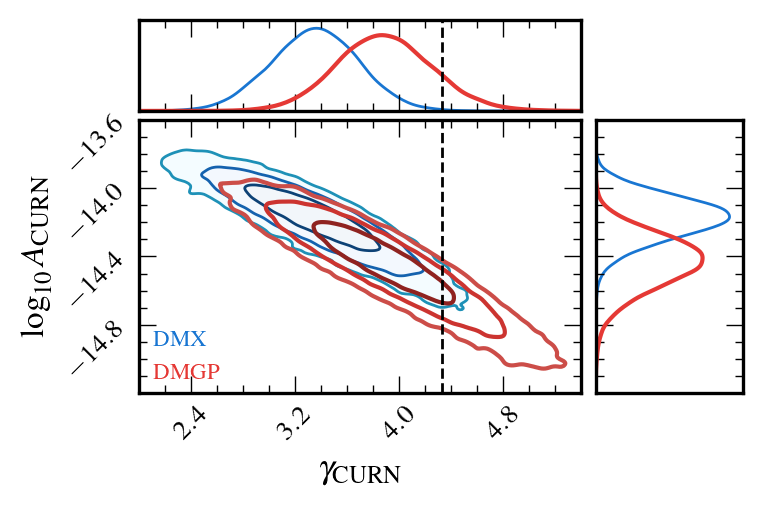

In [7]:
fig = c.plotter.plot(truth=[4.333,-12], figsize=plt.rcParams['figure.figsize'])
fig.axes[2].minorticks_on()
fig.axes[2].tick_params(which='both',direction='in',tick2On=True)
fig.axes[2].set_xlim((2.0, 5.4))
fig.axes[2].set_ylim((-15.2,-13.6))

fig.axes[0].set_xlim(fig.axes[2].get_xlim())
fig.axes[0].tick_params(which='both',direction='in',top=True,labeltop=False,bottom=True,labelbottom=False)
fig.axes[0].set_xticks([2.4, 3.2, 4.0, 4.8])
fig.axes[0].minorticks_on()

fig.axes[3].set_ylim(fig.axes[2].get_ylim())
fig.axes[3].set_yticks([-14.8, -14.4, -14, -13.6])
fig.axes[3].minorticks_on()
fig.axes[3].tick_params(which='both',direction='in',left=True,labelleft=False,right=True,labelright=False)

plt.show()
# plt.savefig('dmgp_comparison.pdf', bbox_inches='tight', dpi=400)